In [39]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### Lectura y analisis del Dataset

In [40]:
df = pd.read_csv("/workspaces/Emiliano0041-IntroML/data/raw/housing.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- En las instrucciones del proyecto nos piden solo quedarme con las columnas Latitude, Longutude y MedHouseVal. Por lo que eliminaremos las demas.

In [41]:
df.drop(["MedHouseVal", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"], axis=1, inplace=True)

#### Escalado

- Realizamos el escalado de todos los valores

In [42]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)



In [43]:
kmeans = KMeans(n_clusters=6, random_state=22, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

df_scaled["cluster"] = clusters

In [44]:
df_scaled

,MedInc,Latitude,Longitude,cluster
0,2.344766,1.052548,-1.327835,4
1,2.332238,1.043185,-1.322844,4
2,1.782699,1.038503,-1.332827,4
3,0.932968,1.038503,-1.337818,4
4,-0.012881,1.038503,-1.337818,5
...,...,...,...,...
20635,-1.216128,1.801647,-0.758826,5
20636,-0.691593,1.806329,-0.818722,5
20637,-1.142593,1.778237,-0.823713,5
20638,-1.054583,1.778237,-0.873626,5


#### Split

In [45]:
X = df_scaled.drop("cluster", axis=1)
y = df_scaled["cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=22, 
                                                    stratify=y)

#### Creacion del modelo, predicciones y visualizaciones.

In [46]:
model_c_rf = RandomForestClassifier()
model_c_rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


- Predecimos

In [47]:
y_pred = model_c_rf.predict(X_test)
y_pred

array([5, 3, 3, ..., 3, 3, 0], shape=(4128,), dtype=int32)

- Medimos el accuracy

In [48]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9927325581395349

- Comprobamos con las metricas, report, recall y demas

In [49]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       113
           1       1.00      1.00      1.00      1315
           2       0.99      0.98      0.99       332
           3       0.99      1.00      0.99       840
           4       0.98      1.00      0.99       560
           5       0.99      0.99      0.99       968

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



- Con un scatterplot visualizamos la distribucion geografica de los hogares, separando por colores la seleccion para la agrupacion de los Clusters.

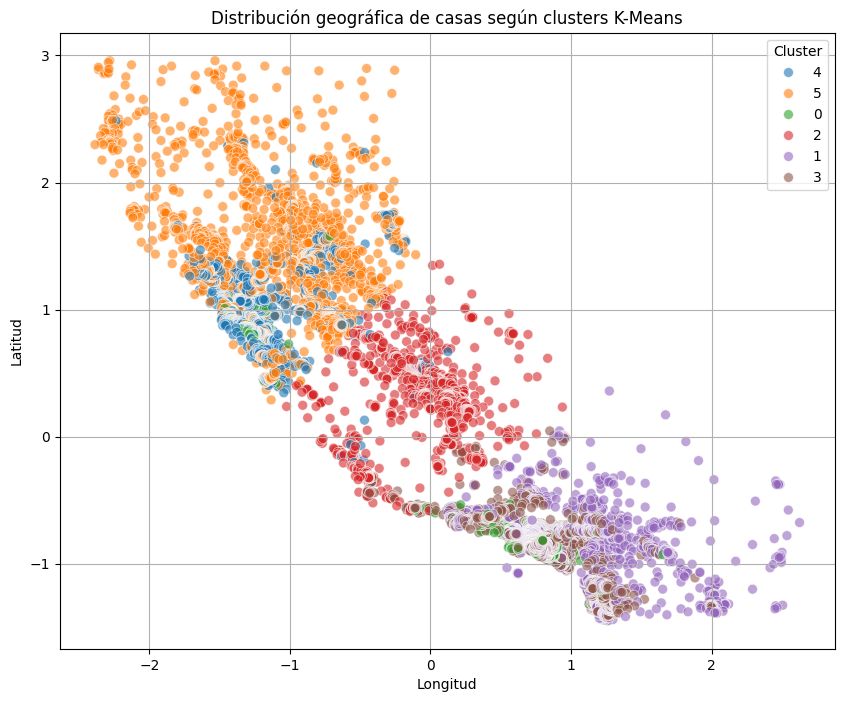

In [51]:



df_scaled["cluster"] = df_scaled["cluster"].astype(str) 

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_scaled,
    x="Longitude", y="Latitude",
    hue="cluster",
    palette="tab10",
    alpha=0.6,
    s=50)

plt.title("Distribución geográfica de casas según clusters K-Means")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


> Como curiosidad vemos que es exactamente igual al mapa geografico de California, lo cual tiene mucho sentido ya que hemos graficado por longitud y latitud.